<h1><center>Adults Dataset</center></h1>

# Machine Learning 1 - Lab 3: Clustering

### Authors:
Richard Kim <br> Connor Dobbs<br> Joaquin Dominguez

In [1]:
# Import relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks

# Hide deprecation warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [2]:
# Full, clean dataset with original attributes
df_clean = pd.read_csv('https://raw.githubusercontent.com/j-dominguez9/ML1_Proj1/main/Data/census_clean.csv')


# OneHotEncoded dataset
df_ohe = pd.read_csv('https://raw.githubusercontent.com/j-dominguez9/ML1_Proj1/main/Data/OHE_Adults.csv')

#

### Split Dataset

First, we seperate the entire dataset into 'train' and 'test' with a 90/10 split. This 'test' set will be used as a hold out set for final evaluation after models have been hyperparameter tuned.

In [3]:
# create train, validation, and test sets

from sklearn.model_selection import train_test_split
from collections import Counter

df_2 = df_ohe.copy()

np.random.seed(42)
train, test = np.split(df_2.sample(frac=1), [int(.9*len(df_2))])
print(len(train))

40657


In [4]:
### import relevant function
from sklearn.model_selection import ShuffleSplit

### acquire target label values, delete column of said acquired values, and assign remaining variables and corresponding values to 'X'

if 'income' in train:
    y_train = train['income'].values 
    del train['income'] 
    X_train = train.values 


# target label values for test set
if 'income' in test:
    y_test = test['income'].values 
    del test['income'] 
    X_test = test.values 

#create train2 to keep version with age
train2 = train.copy()


In [5]:
### Redo above for age variable as outcome

if 'age' in train:
    yAge_train = train['age'].values 
    del train['age'] 
    XAge_train = train.values 

if 'age' in test:
    yAge_test = test['age'].values 
    del test['age'] 
    XAge_test = test.values 

### Standardize and Scale Data

We will standardize the dataset to ensure that each variable is weighted equally, since there are many variables on very different scales as well as one hot encoded categorical variables. This should help reduce model bias, improving performance, as well as making feature importance easier to interpret later on. 

In [6]:
from sklearn.preprocessing import StandardScaler
#standard set
scl_obj = StandardScaler()
scl_obj.fit(X_train)
X_train = scl_obj.transform(X_train) 
X_test = scl_obj.transform(X_test)

### Split Dataset

In data preparation, we seperated the entire dataset into 'train' and 'test' with a 80/20 split. This 'test' set will be used for final evaluation after models have been hyperparameter tuned.

Within the 'train' set, we create a 10-fold shuffle split cross validation object that can be used with the regular, over, and under sampled training data.

In [7]:
### import relevant function
from sklearn.model_selection import ShuffleSplit

### split data 80/20 with 10 cross-validation
num_cv_iterations = 10
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2, random_state = 42)
                         
print(cv_object)

ShuffleSplit(n_splits=10, random_state=42, test_size=0.2, train_size=None)


## Business Understanding

Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). How will you measure the effectiveness of a good algorithm? Why does your chosen validation method make sense for this specific
dataset and the stakeholders needs?

*Delete before submitting

### Purpose of Data:

This data was originally collected as part of the 1994 US Census. According to census.gov, The purpose of the Census is for the government to better understand the demographics of the people living there and where a variety of metrics are trending. This information is used to help determine where and how to allocate federal and state funding. The raw data was then extracted and compiled by Barry Becker and is available on UCI's machine learning repository here: https://archive.ics.uci.edu/ml/datasets/adult

### Evaluation Metrics
Accuracy: <br>
> The first metric we will be using is Accuracy. By accuracy, we mean "the ratio of number of correct predictions to the total number of input samples."[^1] 

> Accuracy = Number of Correct Predictions/Total Number of Predictions Made

> By balancing our datset with respect to our target variable, we took measures to maximize the value that this metric provides. For our dataset, accuracy will give us a measure of how maany instances are correctly classified as >=50K  or <50K, in any given model.

Precision: <br>
> In order to get a more detailed look at what accuracy represents, we first break down the metric into Precision and Recall. Precision, in essence, outlines the proportion of positive identifications was actually correct[^2].

> Precision = True Positive/(True Positive + False Positive)

> For our dataset, Precision will give us a measure of the proportion of positives (>=50K) were classified correctly.

Sensitivity/Recall: <br>

> Recall, on the other hand, measures the proportion of actual positives that  were identified correctly[^3].

> Recall = True Positive/(True Positive + False Negative)

> For our dataset, Recall will give us a measure of how many of the instances that were actually >=50K were classified as such by the model.

Specificity: <br>
> Inversely to the previous measure, specificity (True Negative Rate) refers to the "proportion of negative data points that are correctly considered as negative, with respect to all negative data points."[^5]

> Sensitivity = True Negative/(True Negative + False Positive)

> For our dataset, specificity measures the proportion of actual <50K classified as such by a given model.

While we will look at the above metrics for income classifcation, the primary metric we will be looking to optimize in this case is Sensitivity, as it is the more useful metric in many contexts because it is harder to predict because it is a minority of people, and because predicting high earners could be used for things like targeted marketing campaigns for high margin products. 

[^1]: https://towardsdatascience.com/metrics-to-evaluate-your-machine-learning-algorithm-f10ba6e38234
[^2]: https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall
[^3]: https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall
[^4]: https://towardsdatascience.com/metrics-to-evaluate-your-machine-learning-algorithm-f10ba6e38234
[^5]: https://towardsdatascience.com/metrics-to-evaluate-your-machine-learning-algorithm-f10ba6e38234

### Age Prediction Evaluation Metric
RMSE: <br>
> The main metric we will be using to evaluate our prediction models for age is RMSE, or root mean squared error. 

> The RMSE of a model will tell us how far our model predictions deviate from the actual values. For our dataset, RMSE will measure the standard deviation of our model's predicted age from the actual age. 

## Data Understanding 1

Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file. Verify data quality: Are there missing values? Duplicate data? Outliers? Are those mistakes? How do you deal with these problems?

*Delete before submitting

### Data Meaning and Type

The dataset contains 48,842 observations with 15 total variables, for a total of 732,630 data elements. The below list contains each attribute definition based on the UCI archive and data type determined in the code below. 

* age (integer between 17 and 90): The age of the individaul observed.
* workclass (object with 8 levels): The employment type of the individual. For example if they are self employed or government employed. 
* fnlwgt (integer between ~12,285 and ~1,490,400): The definition of this is slightly unclear, but generally seems to be the number of people the census estimates the observation represents. 
* education (object with 16 levels): Category of education completed by observation.
* educational-num (integer between 1 and 16): Numeric value of education completed by observation. 
* marital-status (object with 7 levels): Marital status of individual, including if their spouse is in the armed forces or absent.
* occupation (object with 14 levels): The type of work the indidividual does.
* relationship (object with 6 levels): Relationship individual has with others in the househould, similar to marital status but includes other categories potentially more applicable to younger observations such as ownly child or not in a family. 
* race (object with 5 levels): Race of indivdual
* sex (object with 2 levels): Sex of individual, male or female
* capital-gain (integer between 0 and 99,999): Self-reported capital gains by the indidivdual for the most recent year.
* capital-loss (integer between 0 and 4,356): Self-reported capital losses by the individual for the most recent year. 
* hours-per-week (integer between 1 and 99): Self-reported number of hours worked per week by the individual.
* native-country (object with 42 levels): Native country of the individual
* income (object with 2 levels): Self-reported income class for the individual, either greater or less than $50k.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/j-dominguez9/ML1_Proj1/main/Data/adult.csv') # read in the csv file

#replace question mark values as na
df = df.replace('?', np.NaN)

df.info()

# below method of finding count of unique values by column from: https://www.geeksforgeeks.org/how-to-count-distinct-values-of-a-pandas-dataframe-column/

n = df.nunique(axis=0)
  
print("No.of.unique values in each column :\n",
      n)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
No.of.unique values in each column :
 age                   74
workclass    

### Missing Values

There are missing values in 3 of the columns: workclass, occupation, and native-country. 

While a missing value in occupation could indicate unemployed, it would then be expected to better align with the count of workclass in the level of "never-worked" and/or "Without pay", however this is not the case. 

It is also seen that all 2,799 missing workclass values are also missing an occupation. This pattern might suggest that they are unemployed, however they are still reporting working hours as well as at times income > $50k. 

The most likely explanation is a data collection or data quality issue for these two fields, since everyone should have a native country and class of work. With no clear pattern to these missing values, we will drop these records rather than trying to impute and potentially bias the dataset.  

In [9]:
# count missing values in each column
df.isna().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

### Duplicate Values

There were 47 duplicate values in the dataset. While duplicates are unlikely, they are possible that two people responded with the same information to this set of census questions. While the data may be real, it still poses a risk of biasing the dataset towards these observations, when they contain the same information. Because of this, these 47 records are also removed. 

In [10]:
bool_series = df.duplicated(keep='first')

#count duplicates
np.shape(df[bool_series])

#view duplicates
df[bool_series]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
864,24,Private,194630,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States,<=50K
11189,37,Private,52870,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
11212,29,Private,36440,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
13848,30,Private,180317,Assoc-voc,11,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,<=50K
15960,18,Self-emp-inc,378036,12th,8,Never-married,Farming-fishing,Own-child,White,Male,0,0,10,United-States,<=50K
18476,39,Private,184659,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K
19399,19,Private,130431,5th-6th,3,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,36,Mexico,<=50K
19726,41,Private,116391,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
20606,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
21162,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K


### Outliers

In checking for outliers, a preliminary visual inspection was used on the distributions of the numeric columns. Other methods considered were IQR and Z-Score based methods, however, since the numeric fields in this dataset are all heavily skewed toward a specific value (such as 40 hour work weeks or 0 capital gains), numerous realistic values are flagged by conventional measures. During the modeling effort, it could be worth investigating scaling these measures or turning them into factors, particularly with capital-gain, where the data suggests that any gains over 99,999 are all classified as a 99,999. 

<AxesSubplot:xlabel='capital-gain'>

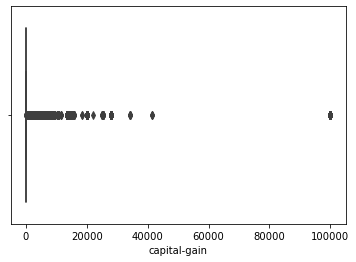

In [11]:
from scipy import stats

z = np.abs(stats.zscore(df['hours-per-week']))

np.shape(np.where(z > 4))

sns.boxplot(df['capital-gain'])

<AxesSubplot:xlabel='capital-loss'>

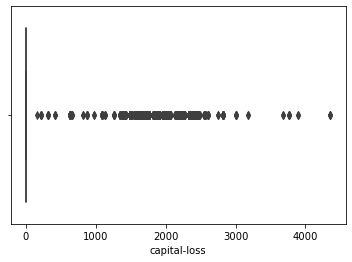

In [12]:
sns.boxplot(df['capital-loss'])

<AxesSubplot:xlabel='fnlwgt'>

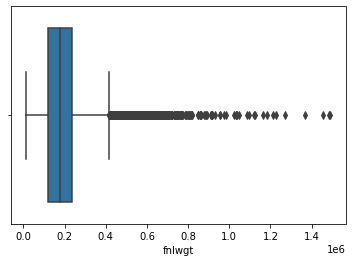

In [13]:
sns.boxplot(df['fnlwgt'])

<AxesSubplot:xlabel='hours-per-week'>

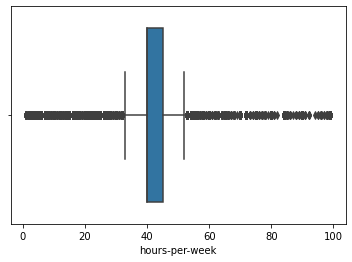

In [14]:
sns.boxplot(df['hours-per-week'])

In [15]:
df[df['capital-gain'] > 50000]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
83,44,Self-emp-inc,223881,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,99999,0,50,NaN,>50K
346,39,Private,198654,HS-grad,9,Divorced,Exec-managerial,Unmarried,Black,Female,99999,0,40,United-States,>50K
357,50,Self-emp-not-inc,165001,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,80,United-States,>50K
418,54,Self-emp-inc,159219,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,40,United-States,>50K
692,41,Private,191547,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,55,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48109,47,Private,155664,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,55,United-States,>50K
48253,43,Self-emp-inc,62026,Prof-school,15,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,40,United-States,>50K
48371,66,Private,115498,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,55,NaN,>50K
48519,47,Private,294913,Prof-school,15,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,40,United-States,>50K


## Data Understanding 2

Visualize the any important attributes appropriately. Important: Provide an interpretation for any charts or graphs.

*Delete before submitting

### Visualize Attributes
#### Education
Via domain knowledge, we suspect education to be a strong predictor for income; thus, it will be the first variable we will visualize. To avoid manipulating the dataset in a manner that may affect future models, we will run all visualizations through a copy of the dataset (df_viz). For the first variable, Education, we made sure it was set as categorical, then releveled the factors, such that they are outlined from least to highest vis-a-vis education level for easier interpretation. The histogram shows an unbalanced distribution, such that all levels don't have the same number of instances. When modeling, it will be prudent to create more pragmatic levels (e.g., "< High school", "HS-college/trade", "Bachelor's", "Post-high school") to address this concern.

In [16]:
df_clean.head()

,Unnamed: 0,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


[Text(0.5, 1.0, 'Distribution of Education')]

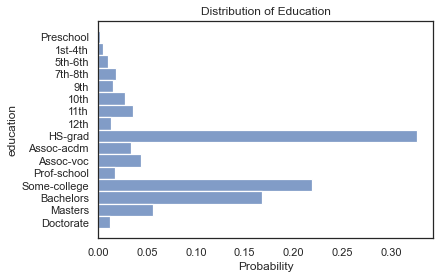

In [17]:
# Set variable as categorical, reorder factor levels form least to most education
sns.set_theme(style='white', palette='deep')

df_viz = df_clean.copy()

df_viz["education"] = df_viz["education"].astype('category')

df_viz["education"] = df_viz["education"].cat.as_ordered()

df_viz["education"] = df_viz["education"].cat.set_categories(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'HS-grad', 'Assoc-acdm', 'Assoc-voc', 'Prof-school', 'Some-college', 'Bachelors', 'Masters', 'Doctorate'], ordered=True)

sns.histplot(data = df_viz, y = "education", discrete = True, stat = 'probability', alpha = 0.7, legend = False).set(title="Distribution of Education")

#### Age
Since Age is continous variable, there is no need to rearrange levels of factors, as was done for Education. A visual inspection of the histogram below suggests the distribution to have a right skew. There also seems to be an abnormally high occurrence of instances of age 36, specifically 1283 of them. A transformation may be beneficial for further statistical anaylses and modeling. The attribute ranges from 17 to 90, with a mean of 38.6. The boxplot allows a different perspective by which we can see the right-skew and the presence of outliers outside of the inter-quartile range (IQR).

Highest Ocurrence: [(36, 1283)]


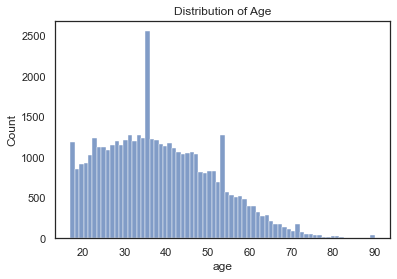

In [18]:
# Histogram
sns.histplot(data = df_viz, x = "age", alpha = 0.7).set(title="Distribution of Age")

# Find instance with highest occurences, code based on: https://www.codegrepper.com/code-examples/python/python+element+with+max+count
from collections import Counter

c = Counter(df_viz["age"])

print("Highest Ocurrence:", c.most_common(1))

#### Income
Income is one of the response variables being used, so it is essential to be aware of the distribution found therein. In this case, we have a significantly unbalanced dataset with respect to income--this, unfortunately, may compromise the accuracy and utility of models derived from this dataset. There are methods to balance the data, however, that may be used prior to modeling, if found prudent to do so. Although this distribution may reflect the reality of income distribution in the US in 1994, a balanced distribution allows us to lower the No Information Rate, which makes the evaluative metrics of a model more valuable for prediction and classification purposes. We are treating this variable as discrete, despite Income being numeric in nature; thus, we defined it as such prior to plotting. A simple bar graph/histogram is effective at clearly providing the insights discussed above.

Percentages by Income:
 <=50K    75.203099
>50K     24.796901
Name: income, dtype: float64


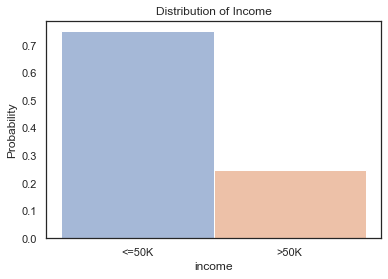

In [19]:
df_viz["income"] = df_viz["income"].astype('category')

df_viz["income"] = df_viz["income"].cat.as_ordered()

sns.histplot(data = df_viz, x = 'income', discrete = True, stat = 'probability', hue = 'income', legend = False).set(title="Distribution of Income")

# Outline percentages by income, code based on: https://stackoverflow.com/questions/53690279/pandas-percentage-count-of-categorical-variable
print("Percentages by Income:\n", (df_viz["income"].value_counts() / len(df_viz["income"]))*100)

### Explore Joint Attributes
In this section, we will begin looking at relationships between attributes. 

#### Income vs. Age
Via domain knowledge and common sense, we suspect Age to be a strong predictor of Income. This violin plot allows us to very clearly see the diffences between the IQR of both income groups, with respect to gender. The group with an annual income greater than $50K appears to have an IQR that is considerably higher on the age axis. For both Male and Female cases, we see a considerable shift along the age axis between the Income groups.

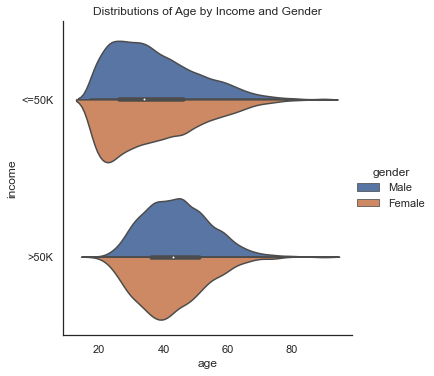

In [20]:
sns.catplot(x="age", y="income", hue="gender", kind="violin", split = True, data=df_viz).set(title= "Distributions of Age by Income and Gender")

### Income vs. Education
As mentioned, we suspect Education to be a strong predictor for Income. The variable labeled Educational-num has the categories ranked in education levels, so we can use that for visualization purposes to examine the relationship.

This boxplot depicts the distributions found in both income groups with respect to Education. Those in the <=50K group seem to percolate within an education level between 8-12, whereas the higher income group has a wider range and appears to be hgiher up along the educational-num axis, supporting our initial suspicion.

[Text(0.5, 1.0, 'Distribution of Income by Education')]

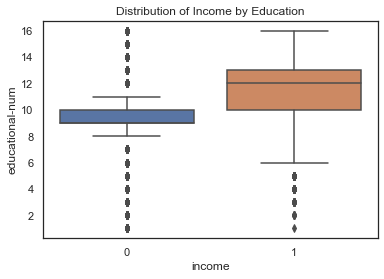

In [21]:
sns.boxplot(data= df_2, x = "income", y = "educational-num").set(title="Distribution of Income by Education")

## Modeling and Evaluation 1

Perform cluster analysis using several clustering methods

*Delete before submitting

### Kmodes Clustering

Since there are so many categorical variables in this dataset, we will be primarily modeling with kmodes clustering method. Kmodes defines clusters based on matching categories between data points, rather than off Euclidean distance in more typical Kmeans methods. 

Package documentation from: https://pypi.org/project/kmodes/
Modeled example notebook referenced: https://www.kaggle.com/code/ashydv/bank-customer-clustering-k-modes-clustering


### Methods

Two Kmodes methods will be tried with various degrees of initilization. The first method is Cao, which chooses initial groups based on density, as a result, putting more emphasis on variables with few category. The other method, Huang's, selects the first k objects from the datset as initial cluster centers. 

Info from: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5753022/

In [22]:
# setup
import warnings

warnings.filterwarnings('ignore')
X = df_clean.copy()

In [23]:
# preprocessing, encoding categorical data for analysis
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
X = X.apply(le.fit_transform)
X.head()

,Unnamed: 0,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,0,8,2,18119,1,6,4,6,3,2,1,0,0,39,38,0
1,1,21,2,3913,11,8,2,4,0,4,1,0,0,49,38,0
2,2,11,1,23770,7,11,2,10,0,4,1,0,0,39,38,1
3,3,27,2,10474,15,9,2,6,0,2,1,96,0,39,38,1
4,4,17,2,15397,0,5,4,7,1,4,1,0,0,29,38,0


In [24]:
# Importing Library
from kmodes.kmodes import KModes

In [32]:
import warnings
warnings.filterwarnings('ignore')

X = df_clean.copy()
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
X = X.apply(le.fit_transform)
kmodes_seed = 111

km_huang = KModes(n_clusters = 7, init = "Huang", n_init = 1, verbose = 1, random_state=kmodes_seed)
fitClusters_huang = km_huang.fit_predict(X)
clusterCentroidsDf = pd.DataFrame(km_huang.cluster_centroids_)
clusterCentroidsDf.columns = X.columns

#combine predictions with original DF
X = df_clean.copy().reset_index()
clustersDf = pd.DataFrame(fitClusters_huang)
clustersDf.columns = ['cluster_predicted']
combinedDfhuang = pd.concat([X, clustersDf], axis = 1).reset_index()
combinedDfhuang = combinedDfhuang.drop(['index', 'level_0'], axis = 1)

plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDfhuang['income'],order=combinedDfhuang['income'].value_counts().index,hue=combinedDfhuang['cluster_predicted'])
plt.show()

In [26]:
km_cao = KModes(n_clusters = 2, init = "Cao", n_init = 1, verbose = 1)
fitClusters_cao = km_cao.fit_predict(X)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6526, cost: 326201.0
Run 1, iteration: 2/100, moves: 299, cost: 326201.0


In [29]:
#mode of clusters
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = X.columns
clusterCentroidsDf

,Unnamed: 0,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,0,19,2,7339,11,8,2,2,0,4,1,0,0,39,38,0
1,6,6,2,6567,15,9,4,0,1,4,0,0,0,39,38,0


In [30]:
#choose optimal k based on cost
cost = []
for num_clusters in list(range(1,10)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(X)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 362653.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6526, cost: 326201.0
Run 1, iteration: 2/100, moves: 299, cost: 326201.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 8294, cost: 314056.0
Run 1, iteration: 2/100, moves: 542, cost: 314056.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 8584, cost: 309078.0
Run 1, iteration: 2/100, moves: 1494, cost: 309076.0
Run 1, iteration: 3/100, moves: 0, cost: 309076.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 8987, cost: 304910.0
Run 1, iteration: 2/100, moves: 0, cost: 304910.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
R

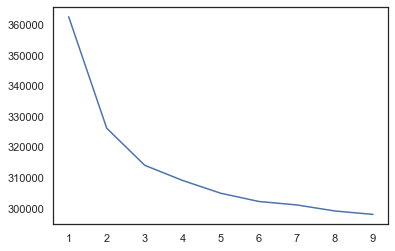

In [33]:
y = np.array([i for i in range(1,10,1)])
plt.plot(y,cost)

In [34]:
#choosing k = 3
km_cao = KModes(n_clusters = 3, init = "Cao", n_init = 1, verbose = 1, random_state=kmodes_seed)
fitClusters_cao = km_cao.fit_predict(X)

#mode of clusters
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = X.columns
clusterCentroidsDf

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 8294, cost: 314056.0
Run 1, iteration: 2/100, moves: 542, cost: 314056.0


,Unnamed: 0,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,0,19,2,7339,11,8,2,2,0,4,1,0,0,39,38,0
1,6,3,2,6567,15,9,4,0,1,4,0,0,0,39,38,0
2,4,11,2,7181,9,12,4,9,1,4,1,0,0,39,38,0


In [35]:
#combine predictions with original DF
X = df_clean.copy().reset_index()

In [37]:
clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([X, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)
combinedDf.head()

,Unnamed: 0,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,cluster_predicted
0,0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,0
1,1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,0
2,2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,0
3,3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,0
4,5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K,2


In [40]:
cluster_0 = combinedDf[combinedDf['cluster_predicted'] == 0]
cluster_1 = combinedDf[combinedDf['cluster_predicted'] == 1]
cluster_2 = combinedDf[combinedDf['cluster_predicted'] == 2]

#26.5k observations
cluster_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26568 entries, 0 to 45174
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         26568 non-null  int64 
 1   age                26568 non-null  int64 
 2   workclass          26568 non-null  object
 3   fnlwgt             26568 non-null  int64 
 4   education          26568 non-null  object
 5   educational-num    26568 non-null  int64 
 6   marital-status     26568 non-null  object
 7   occupation         26568 non-null  object
 8   relationship       26568 non-null  object
 9   race               26568 non-null  object
 10  gender             26568 non-null  object
 11  capital-gain       26568 non-null  int64 
 12  capital-loss       26568 non-null  int64 
 13  hours-per-week     26568 non-null  int64 
 14  native-country     26568 non-null  object
 15  income             26568 non-null  object
 16  cluster_predicted  26568 non-null  uint1

In [41]:
#11.5k observations
print(cluster_1.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11498 entries, 6 to 45169
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         11498 non-null  int64 
 1   age                11498 non-null  int64 
 2   workclass          11498 non-null  object
 3   fnlwgt             11498 non-null  int64 
 4   education          11498 non-null  object
 5   educational-num    11498 non-null  int64 
 6   marital-status     11498 non-null  object
 7   occupation         11498 non-null  object
 8   relationship       11498 non-null  object
 9   race               11498 non-null  object
 10  gender             11498 non-null  object
 11  capital-gain       11498 non-null  int64 
 12  capital-loss       11498 non-null  int64 
 13  hours-per-week     11498 non-null  int64 
 14  native-country     11498 non-null  object
 15  income             11498 non-null  object
 16  cluster_predicted  11498 non-null  uint1

In [42]:
#7k observations
print(cluster_2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7109 entries, 4 to 45167
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         7109 non-null   int64 
 1   age                7109 non-null   int64 
 2   workclass          7109 non-null   object
 3   fnlwgt             7109 non-null   int64 
 4   education          7109 non-null   object
 5   educational-num    7109 non-null   int64 
 6   marital-status     7109 non-null   object
 7   occupation         7109 non-null   object
 8   relationship       7109 non-null   object
 9   race               7109 non-null   object
 10  gender             7109 non-null   object
 11  capital-gain       7109 non-null   int64 
 12  capital-loss       7109 non-null   int64 
 13  hours-per-week     7109 non-null   int64 
 14  native-country     7109 non-null   object
 15  income             7109 non-null   object
 16  cluster_predicted  7109 non-null   uint16

## Plotting

For plotting, to obtain a better understanding of how the clusters are grouping different attributes, we will explore what was previosly shown as the most important variables in the logistic regression classification of income. 

### Age

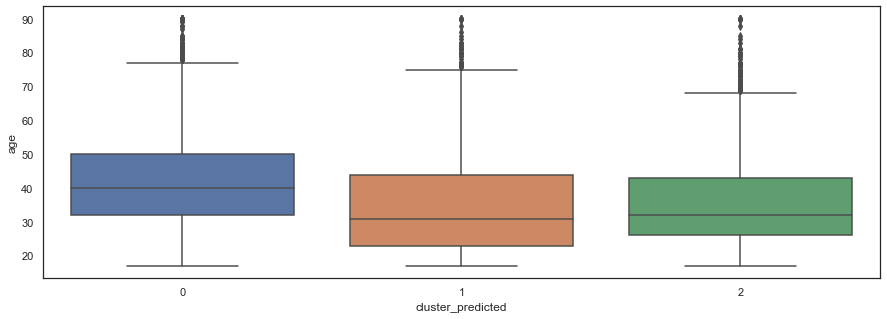

In [54]:
plt.subplots(figsize = (15,5))
sns.boxplot(x=combinedDf['cluster_predicted'],y = combinedDf['age'])
plt.show()

### Income

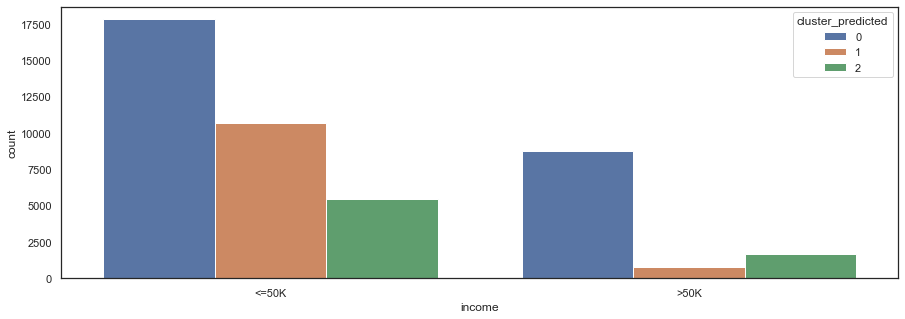

In [57]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['income'],order=combinedDf['income'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

### Hours Worked

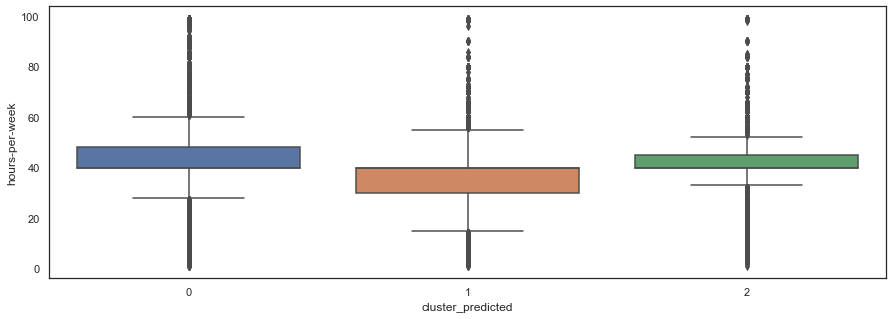

In [55]:
plt.subplots(figsize = (15,5))
sns.boxplot(x=combinedDf['cluster_predicted'],y = combinedDf['hours-per-week'])
plt.show()

### Education

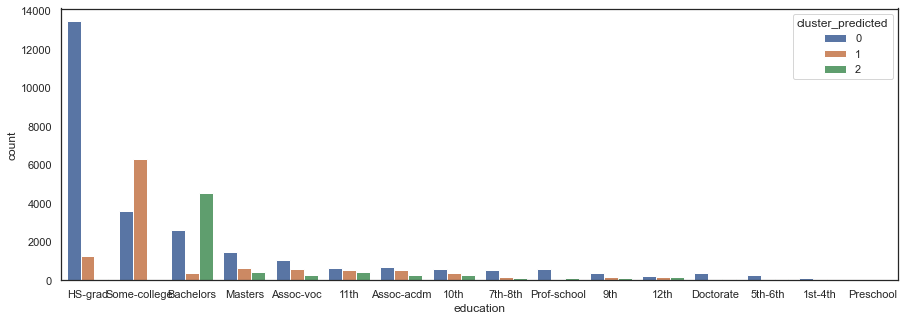

In [56]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['education'],order=combinedDf['education'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

### Race

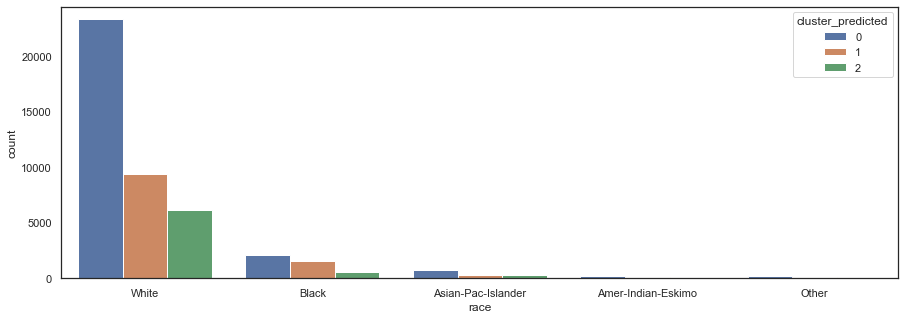

In [59]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['race'],order=combinedDf['race'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

### Marital Status

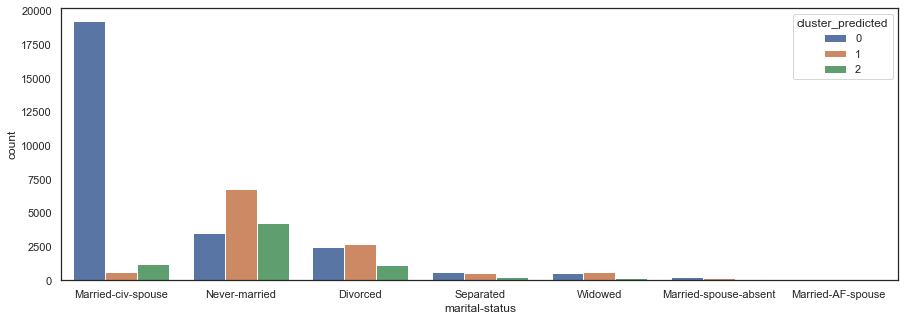

In [62]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['marital-status'],order=combinedDf['marital-status'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

### Gender

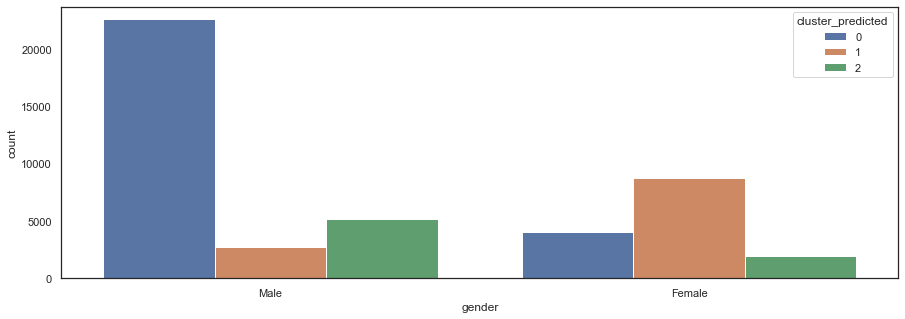

In [63]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['gender'],order=combinedDf['gender'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

### Work Class

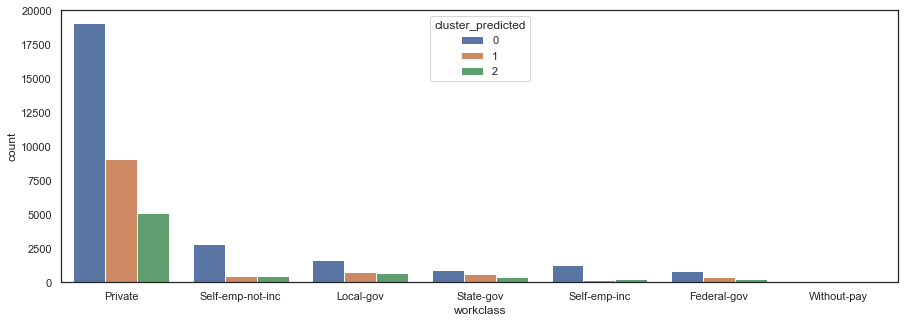

In [64]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['workclass'],order=combinedDf['workclass'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

<ipython-input-71-de57cb39dcd2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['age_grp'] = pd.cut(X['age'], [0,18,30], include_lowest=True)
<ipython-input-71-de57cb39dcd2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['age_grp'] = pd.factorize(X['age_grp'])[0]


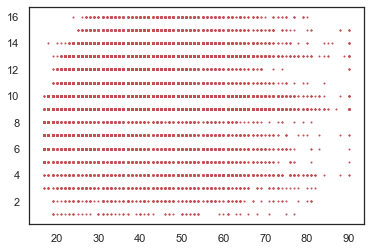

In [71]:
df_copy = df_clean.copy()
X = df_copy[['age','educational-num']]
X['age_grp'] = pd.cut(X['age'], [0,18,30], include_lowest=True)
X['age_grp'] = pd.factorize(X['age_grp'])[0]

plt.plot(X['age'], X['educational-num'], 'r.', markersize=2)
plt.show()

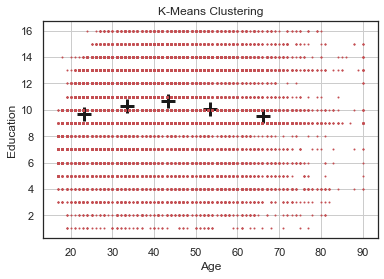

In [72]:
from sklearn.cluster import KMeans

#--------Change parameters below this line---------------------------
# CHANGE THE PARAMETERS HERE TO GET A CONSISTENTLY OPTIMAL CLUSTERING
# run kmeans algorithm (this is the most traditional use of k-means)
kmeans = KMeans(
    init='k-means++',    # initialization
    n_clusters=5,    # number of clusters
    n_init=10)         # number of different times to run k-means

kmeans.fit(X)

# visualize the data
centroids = kmeans.cluster_centers_
plt.plot(X['age'], X['educational-num'], 'r.', markersize=2) #plot the data
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='+', s=200, linewidths=3, color='k')  # plot the centroids
plt.title('K-Means Clustering')
plt.xlabel('Age')
plt.ylabel('Education')
plt.grid()
plt.show()

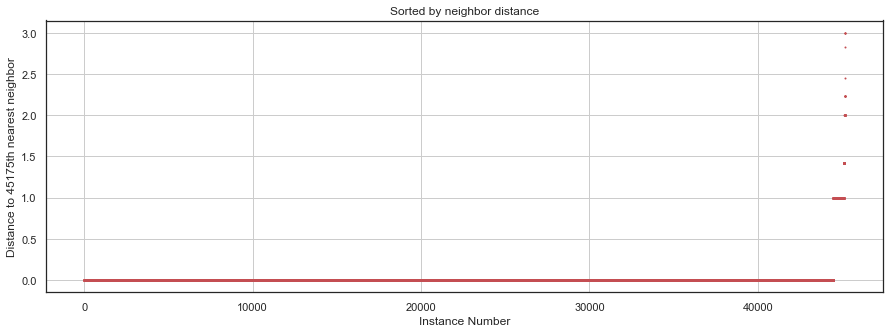

In [73]:
from sklearn.neighbors import kneighbors_graph

#=======================================================
# CHANGE THESE VALUES TO ADJUST MINPTS FOR EACH DATASET
N = 5
#=======================================================

# create connectivity graphs before calcualting the hierarchy
knn_graph = kneighbors_graph(X, N, mode='distance') # calculate distance to four nearest neighbors 

N = knn_graph.shape[0]
X4nn_distances = np.zeros((N,1))
for i in range(N):
    X4nn_distances[i] = knn_graph[i,:].max()

X4nn_distances = np.sort(X4nn_distances, axis=0)

plt.figure(figsize=(15,5))
plt.plot(range(N), X4nn_distances, 'r.', markersize=2) #plot the data
plt.title('Sorted by neighbor distance')
plt.xlabel('Instance Number')
plt.ylabel('Distance to {0}th nearest neighbor'.format(N))
plt.grid()
plt.show()

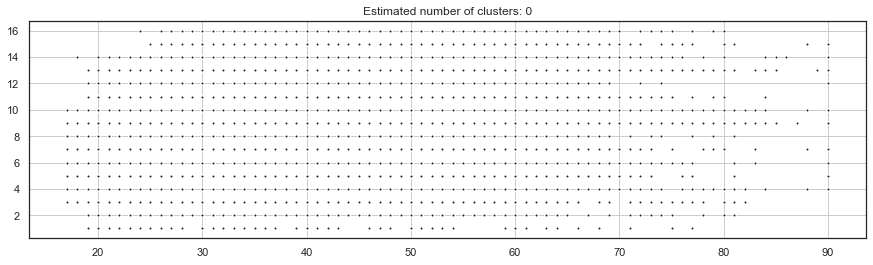

In [74]:
from sklearn.cluster import DBSCAN

#=====================================
# ENTER YOUR CODE HERE TO CHANGE MINPTS AND EPS
minpts = N
eps = 0.03
#=====================================

db = DBSCAN(eps=eps, min_samples=minpts).fit(X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# mark the samples that are considered "core"
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

plt.figure(figsize=(15,4))
unique_labels = set(labels) # the unique labels
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    # plot the core points in this class
    plt.plot(xy['age'], xy['educational-num'], 'o', markerfacecolor=col,
             markeredgecolor='w', markersize=6)

    # plot the remaining points that are edge points
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy['age'], xy['educational-num'], 'o', markerfacecolor=col,
             markeredgecolor='w', markersize=3)

    plt.title('Estimated number of clusters: %d' % n_clusters_)
    plt.grid()
    plt.show()

## Modeling and Evaluation 2

How did you determine a suitable number of clusters for each method?

*Delete before submitting

## Modeling and Evaluation 3

Use internal and/or external validation measures to describe and compare the
clusterings and the clusters (some visual methods would be good).

*Delete before submitting

## Modeling and Evaluation 4

Describe your results. What findings are the most interesting and why?

*Delete before submitting

## Deployment

Be critical of your performance and tell the reader how you current model might be usable by other parties. Did you achieve your goals? If not, can you reign in the utility of your modeling? How useful is your model for interested parties (i.e., the companies or organizations that might want to use it)? How would your deploy your model for interested parties? What other data should be collected? How often would the model need to be updated, etc.?

*Delete before submitting

## Exceptional Work

You have free reign to provide additional analyses or combine analyses.

*Delete before submitting